# <font color='Blue'>Classification - Case Study</font>

# <font color='Blue'>Micro-Mortgage Analysis</font>

Business wants to manage its 

    (a) risk in micro-mortgage loans
    (b) to lower the cost of micro-mortgage loans
    (c) adopt differential pricing for loans
  
In order to achieve its objectives, business needs to accurately predict whether a prospective borrower should be given a loan or not. Business has historical data which it can use for this purpose. The data contains the demographic, economic and social characteristics of borrowers along with loan repayment status (repaid or defaulted). Using SVM, we can build models that use the characteristics of prospective borrowers and obtain the probability of they repaying the loan.

    Let us apply both logistic regression, decision trees and naive-bayes in this case and compare the results

## <font color='Blue'>Importing Libraries</font>

In [290]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sn
%matplotlib inline
from sklearn import metrics

### <font color='Blue'>Function for ROC Curve</font>

In [291]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

## <font color='Blue'>Micro-Mortgage Data</font>

### <font color='Blue'>1.0 Data Preparation</font>

In [292]:
credit_df = pd.read_excel( "cleaned.xlsx",sheet_name='cleaned')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2223 non-null   object 
 1   Decision         2223 non-null   int64  
 2   Selfcon_Code     2223 non-null   int64  
 3   Tier_1           2223 non-null   int64  
 4   Tier_2           2223 non-null   int64  
 5   AccoClass        2223 non-null   int64  
 6   LoanType         2223 non-null   int64  
 7   Gender           2223 non-null   int64  
 8   Etype            2223 non-null   int64  
 9   Doc_prf          2223 non-null   int64  
 10  Marstat          2223 non-null   int64  
 11  Emp_Type_1       2223 non-null   int64  
 12  Emp_Type_2       2223 non-null   int64  
 13  Emp_Type_3       2223 non-null   int64  
 14  Educlass_1       2223 non-null   int64  
 15  Educlass_2       2223 non-null   int64  
 16  Oriclass_1       2223 non-null   int64  
 17  Oriclass_2    

### <font color='Blue'>1.1 Data Preparation - Categorical Variables</font>

In [293]:
credit_df.iloc[0:5,0:14]

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_prf,Marstat,Emp_Type_1,Emp_Type_2,Emp_Type_3
0,AJM-39R8-519413,0,1,0,0,0,1,0,1,0,1,1,0,0
1,AJM-3A3Z-876970,0,1,0,0,0,1,0,0,1,1,0,0,0
2,AJM-7427-952085,1,1,0,0,0,0,0,1,1,1,0,0,0
3,AJM-8ZTZ-979040,1,1,0,0,1,1,0,1,1,1,1,0,0
4,AJM-9SP2-614810,1,1,0,0,0,1,0,1,1,1,1,0,0


### <font color='Blue'>1.2 Class Distribution</font>

In [294]:
credit_df.Decision.value_counts()

# Decision = 1 - Sanction
# Decision = 0 - Reject

1    1792
0     431
Name: Decision, dtype: int64

### <font color='Blue'>1.3 Feature Extraction</font>

In [295]:
# Get the list of independent variables which would be used for classification
X_features = list( credit_df.columns )
len(X_features)

# Some values can be removed as they are either not required or captured in another variable
unwanted = ['ID','Decision','Expen','TotInc','DispInc','OldEmi','OldEmi_d', 'OldEmi_s','BankSave_d','LoanReq','MarVal','BankSave','Dwnpay',
            'CalcEmi','IIR','IAR','FOIR','dwnp_prop']
X_features = [ele for ele in X_features if ele not in unwanted] 
len(X_features)

31

In [296]:
# Adding a constant for Logistic model to work while using statmodels package
Y = credit_df.Decision
X = sm.add_constant( credit_df[X_features] )
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            2223 non-null   float64
 1   Selfcon_Code     2223 non-null   int64  
 2   Tier_1           2223 non-null   int64  
 3   Tier_2           2223 non-null   int64  
 4   AccoClass        2223 non-null   int64  
 5   LoanType         2223 non-null   int64  
 6   Gender           2223 non-null   int64  
 7   Etype            2223 non-null   int64  
 8   Doc_prf          2223 non-null   int64  
 9   Marstat          2223 non-null   int64  
 10  Emp_Type_1       2223 non-null   int64  
 11  Emp_Type_2       2223 non-null   int64  
 12  Emp_Type_3       2223 non-null   int64  
 13  Educlass_1       2223 non-null   int64  
 14  Educlass_2       2223 non-null   int64  
 15  Oriclass_1       2223 non-null   int64  
 16  Oriclass_2       2223 non-null   int64  
 17  eom_25        

### <font color='Blue'>1.4 Split into Train and Test Data</font>

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

### <font color='Blue'>2.0 Logistic Regression Model</font>

In [298]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

         Current function value: 0.352077
         Iterations: 35


### <font color='Blue'>2.1 Model Summary</font>

In [299]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.255     
Dependent Variable:    Decision          AIC:               1159.6626 
Date:                  2021-08-30 21:00  BIC:               1330.8586 
No. Observations:      1556              Log-Likelihood:    -547.83   
Df Model:              31                LL-Null:           -734.88   
Df Residuals:          1524              LLR p-value:       1.6540e-60
Converged:             0.0000            Scale:             1.0000    
No. Iterations:        35.0000                                        
----------------------------------------------------------------------
                 Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
----------------------------------------------------------------------
const             8.6548    1.3985  6.1884 0.0000     5.9137   11.3959
Selfcon_Code     -0.8642    0.5108 -1.6918 0.0907    -1.8654    0.1370
Tier_1            0.2972    0.1959  1.5171 0.1292    -0.0868    0.6812
Tier_2            0.8990    0.2686  3.3477 0.0008     0.3727    1.4254
AccoClass         0.6741    0.2009  3.3558 0.0008     0.2804    1.0678
LoanType          0.2669    0.3703  0.7208 0.4711    -0.4589    0.9927
Gender            0.2826    0.2798  1.0099 0.3126    -0.2659    0.8310
Etype            18.2472 2788.7224  0.0065 0.9948 -5447.5483 5484.0426
Doc_prf           0.0478    0.2148  0.2227 0.8238    -0.3731    0.4687
Marstat           0.2558    0.2785  0.9186 0.3583    -0.2900    0.8017
Emp_Type_1      -18.6648 2788.7224 -0.0067 0.9947 -5484.4602 5447.1307
Emp_Type_2       -0.3514    0.3413 -1.0296 0.3032    -1.0203    0.3175
Emp_Type_3       -0.1064    0.2812 -0.3783 0.7052    -0.6576    0.4448
Educlass_1       -0.0931    0.2052 -0.4539 0.6499    -0.4952    0.3090
Educlass_2        0.1777    0.2107  0.8432 0.3991    -0.2353    0.5906
Oriclass_1        0.1643    0.2622  0.6268 0.5308    -0.3496    0.6782
Oriclass_2        0.5964    0.3815  1.5631 0.1180    -0.1514    1.3441
eom_25           -0.4324    0.1713 -2.5246 0.0116    -0.7680   -0.0967
Age              -0.0219    0.0115 -1.9010 0.0573    -0.0444    0.0007
YrsAdd            0.0034    0.0078  0.4372 0.6620    -0.0119    0.0187
YrsJob           -0.0026    0.0122 -0.2111 0.8328    -0.0266    0.0214
Term             -0.0035    0.0050 -0.7110 0.4771    -0.0133    0.0062
LTV              -0.0586    0.0101 -5.7804 0.0000    -0.0785   -0.0387
LVR              -0.0073    0.0072 -1.0075 0.3137    -0.0214    0.0069
mfoir_p           0.0223    0.0044  5.1184 0.0000     0.0137    0.0308
dwnp_prop_p      -0.0780    0.0095 -8.1992 0.0000    -0.0967   -0.0594
DispInc_s        -0.0099    0.0689 -0.1440 0.8855    -0.1450    0.1252
MarVal_s          0.4627    0.3597  1.2864 0.1983    -0.2423    1.1677
LoanReq_s         0.0732    0.2334  0.3137 0.7538    -0.3842    0.5306
banksave_s        0.0522    0.0193  2.7005 0.0069     0.0143    0.0901
CalcEmi_s        -1.4736    1.4200 -1.0377 0.2994    -4.2568    1.3096
Tier2XAccoClass  -0.5111    0.3466 -1.4747 0.1403    -1.1905    0.1682
======================================================================

"""

### <font color='Blue'>2.2 Model Diagnostics</font>

In [300]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

### <font color='Blue'>2.3 Significant Variables</font>

In [301]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'Tier_2',
 'AccoClass',
 'eom_25',
 'LTV',
 'mfoir_p',
 'dwnp_prop_p',
 'banksave_s']

### <font color='Blue'>2.4 Rebuilding the model with significant variables</font>

In [302]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.369852
         Iterations 8


### <font color='Blue'>2.5 Model Summary</font>

In [303]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.217     
Dependent Variable: Decision         AIC:              1166.9792 
Date:               2021-08-30 21:00 BIC:              1209.7782 
No. Observations:   1556             Log-Likelihood:   -575.49   
Df Model:           7                LL-Null:          -734.88   
Df Residuals:       1548             LLR p-value:      5.8668e-65
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          5.7523    0.6638   8.6656  0.0000   4.4512   7.0533
Tier_2         0.5646    0.1688   3.3460  0.0008   0.2339   0.8954
AccoClass      0.5389    0.1531   3.5196  0.0004   0.2388   0.8390
eom_25        -0.4015    0.1660  -2.4186  0.0156  -0.7269  -0.0761
LTV           -0.0641    0.0066  -9.7087  0.0000  -0.0770  -0.0512
mfoir_p        0.0242    0.0032   7.4545  0.0000   0.0178   0.0305
dwnp_prop_p   -0.0636    0.0072  -8.8207  0.0000  -0.0777  -0.0495
banksave_s     0.0522    0.0205   2.5431  0.0110   0.0120   0.0924
=================================================================

"""

### <font color='Blue'>2.6 Extracting Probabilities</font>

In [304]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.predicted_prob

96      0.956528
1401    0.963237
1994    0.942163
1987    0.953746
859     0.696452
          ...   
583     0.701742
764     0.839740
2079    0.894200
1225    0.773097
930     0.939269
Name: predicted_prob, Length: 667, dtype: float64

### <font color='Blue'>2.7 Classifier Performance</font>

RoC Curve

    RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection
    RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)]
    Higher the AUC, better the model
    AUC < 0.5 model is inferior to a case of having no model
    AUC > 0.7 model is useful

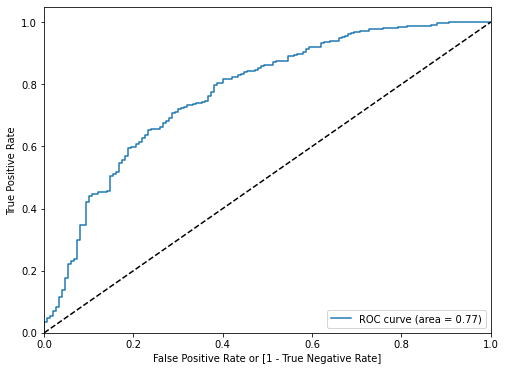

auc_score: 0.77


In [305]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

### <font color='Blue'>2.8 Plotting Distributions and Identifying the optimum Probability</font>

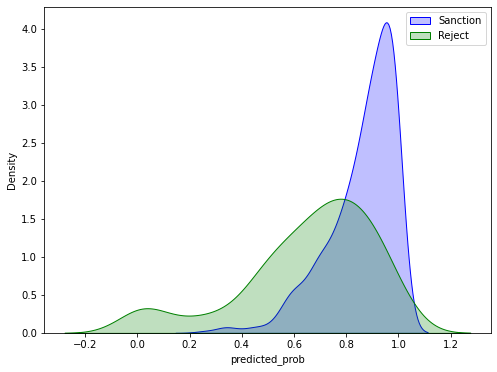

In [306]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>2.9 Confusion Matrix and Performance Measures</font>

Y Predicted
1    430
0    237
Name: predicted, dtype: int64

Y Actual
1    517
0    150
Name: actual, dtype: int64

confusion matrix
[[100  50]
 [137 380]]


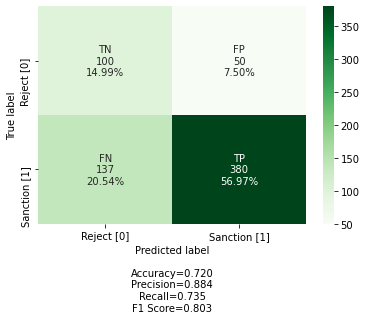

In [307]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.8 else 0)

print("Y Predicted")
print(y_pred_df.predicted.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [0,1] )
print(cm)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [308]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.42      0.67      0.52       150
           1       0.88      0.74      0.80       517

    accuracy                           0.72       667
   macro avg       0.65      0.70      0.66       667
weighted avg       0.78      0.72      0.74       667



### <font color='Blue'>2.10 Cost based Approach for Deriving Threshold</font>

In [309]:
benefit_TNs =   5000
benefit_TPs =  10000 
cost_FNs    =   5000
cost_FPs    =  50000

netbenefit_df = pd.DataFrame( columns = ['prob','TN','TP','FN','FP','total','BTN','BTP','CFN','CFP','net_benefit'])

idx = 0

## iterate cut-off probability values between 0.001 and 0.999

for each_prob in range(0, 99):
    y_pred_df.predicted = y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0)
    cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [0,1] )
    cm_mat = np.array( cm )
    TN = cm_mat[0,0]
    TP = cm_mat[1,1]
    FN = cm_mat[1,0]
    FP = cm_mat[0,1]
    Total = TN + TP + FN + FP
    BTN = TN*benefit_TNs 
    BTP = TP*benefit_TPs
    CFN = FN*cost_FNs
    CFP = FP*cost_FPs 
    net_benefit = BTN + BTP - CFN - CFP
    netbenefit_df.loc[idx] = [(each_prob/100), TN, TP, FN, FP, Total, BTN, BTP, CFN, CFP, net_benefit]
    idx += 1

netbenefit_df.sort_values( 'net_benefit', ascending = False).head(50)

,prob,TN,TP,FN,FP,total,BTN,BTP,CFN,CFP,net_benefit
82,0.82,107.0,365.0,152.0,43.0,667.0,535000.0,3650000.0,760000.0,2150000.0,1275000.0
85,0.85,116.0,330.0,187.0,34.0,667.0,580000.0,3300000.0,935000.0,1700000.0,1245000.0
83,0.83,110.0,348.0,169.0,40.0,667.0,550000.0,3480000.0,845000.0,2000000.0,1185000.0
77,0.77,93.0,410.0,107.0,57.0,667.0,465000.0,4100000.0,535000.0,2850000.0,1180000.0
81,0.81,102.0,377.0,140.0,48.0,667.0,510000.0,3770000.0,700000.0,2400000.0,1180000.0
84,0.84,112.0,340.0,177.0,38.0,667.0,560000.0,3400000.0,885000.0,1900000.0,1175000.0
87,0.87,122.0,301.0,216.0,28.0,667.0,610000.0,3010000.0,1080000.0,1400000.0,1140000.0
86,0.86,118.0,315.0,202.0,32.0,667.0,590000.0,3150000.0,1010000.0,1600000.0,1130000.0
80,0.80,100.0,380.0,137.0,50.0,667.0,500000.0,3800000.0,685000.0,2500000.0,1115000.0
76,0.76,90.0,415.0,102.0,60.0,667.0,450000.0,4150000.0,510000.0,3000000.0,1090000.0


### <font color='Blue'>2.11 Recreating Confusion Matrix and Performance Measures</font>

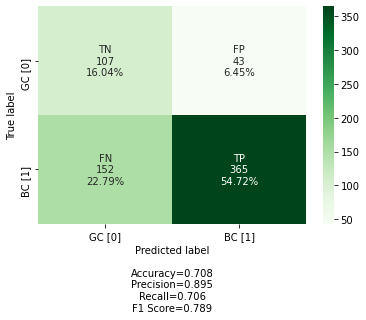

In [310]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.82 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Cost based approach has reduced the FN and increased FP

In [311]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.41      0.71      0.52       150
           1       0.89      0.71      0.79       517

    accuracy                           0.71       667
   macro avg       0.65      0.71      0.66       667
weighted avg       0.79      0.71      0.73       667



### <font color='Blue'>3.0 Decision Tree Classifier</font>

Classification and regresssion tree is a classification and regression algorithm which uses divide and conquer strategy for classifying or regressing an outcome variable. The steps use in CART are
  
   1. Start with the complete training data in the root node.
   2. Decide on the measure of impurity that is either GINI index or Entropy. Search for a predictor variable that minimizes  
      the impurity (SSE in case of regression) when the parent node is split into children nodes.
   3. Repeat step 2 for each subset of the data using the independent variables untill
      (a) All dependent variables are exhausted
      (b) The stopping criteria is met. Stopping criteria could be number of levels of tree from the root node, minimum number 
      of observations in parent/child node (eg., 10% of the training data) and minimum reduction in impurity index
   4. Generate business rules for the leaf (terminal) nodes of the tree.

### <font color='Blue'>3.1 Build Decision Tree Classifier - Gini Criteria</font>

In [312]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [313]:
y_train.value_counts()

1    1275
0     281
Name: Decision, dtype: int64

### <font color='Blue'>3.2 Extracting Probabilities</font>

In [314]:
# Identifying optimal probability
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [315]:
# Printing on Test Data
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
1873,1,0.828729
634,1,0.917808
767,0,0.828729
585,1,0.917808
976,1,0.668203
555,1,0.828729
2072,0,0.828729
1903,0,0.222222
447,1,0.828729
69,1,0.828729


### <font color='Blue'>3.3 Classifier Performance</font>

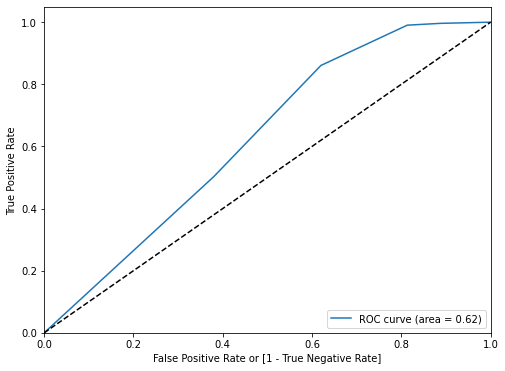

0.6240747904577693

In [316]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>3.4 Plotting Distributions and Identifying Optimal Probability</font>

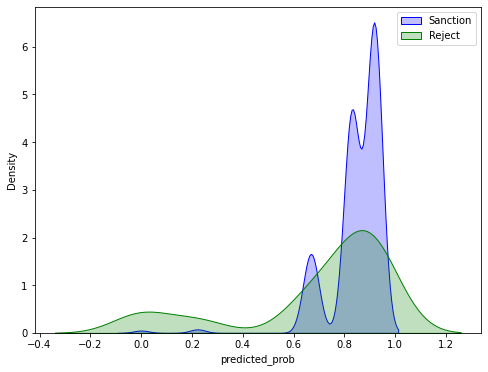

In [317]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>3.5 Confusion Matrix and Performance Measures</font>

Y Predicted
1    538
0    129
Name: tree_predict, dtype: int64

Y Actual
1    517
0    150
Name: actual, dtype: int64

confusion matrix
[[ 57  93]
 [ 72 445]]


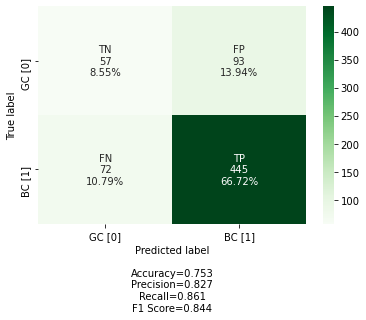

In [318]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.775 else 0)

print("Y Predicted")
print(y_pred_df.tree_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.tree_predict, [0,1] )
print(cm)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [319]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       150
           1       0.83      0.86      0.84       517

    accuracy                           0.75       667
   macro avg       0.63      0.62      0.63       667
weighted avg       0.74      0.75      0.75       667



### <font color='Blue'>3.6 Visualizing Decision Tree</font>

In [320]:
# Install graphviz and pydotplus

In [321]:
# pip install graphviz

In [322]:
# pip install pydotplus

In [323]:
# Displaying the tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Reject', 'Sanction'], filled = True) # Class names in numerical order

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

True

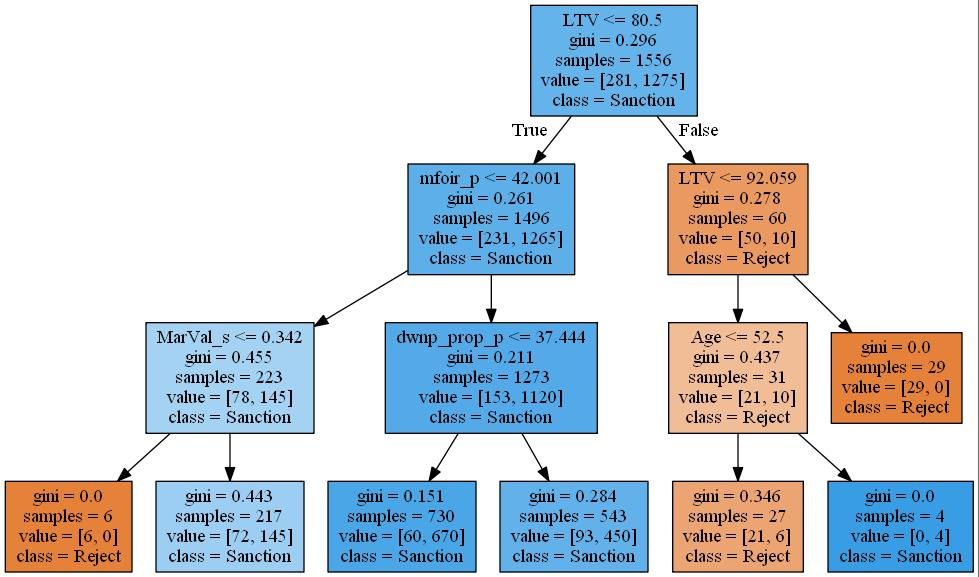

In [324]:
# Render the png file
Image(filename='chd_tree.png')

### <font color='Blue'>3.7 Calculating GINI impurity</font>

In [325]:
gini_node_1 = 1 - pow(231/1496, 2) - pow (1265/1496, 2)
print( round( gini_node_1, 4) )

0.2611


### <font color='Blue'>3.8 Decision Tree using Entropy Criteria</font>

In [326]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

# Export the tree into odt file
export_graphviz( clf_tree_entropy, out_file = "chd_tree_entropy.odt", feature_names = X_train.columns, filled = True,class_names= ['Reject', 'Sanction'] )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )

True

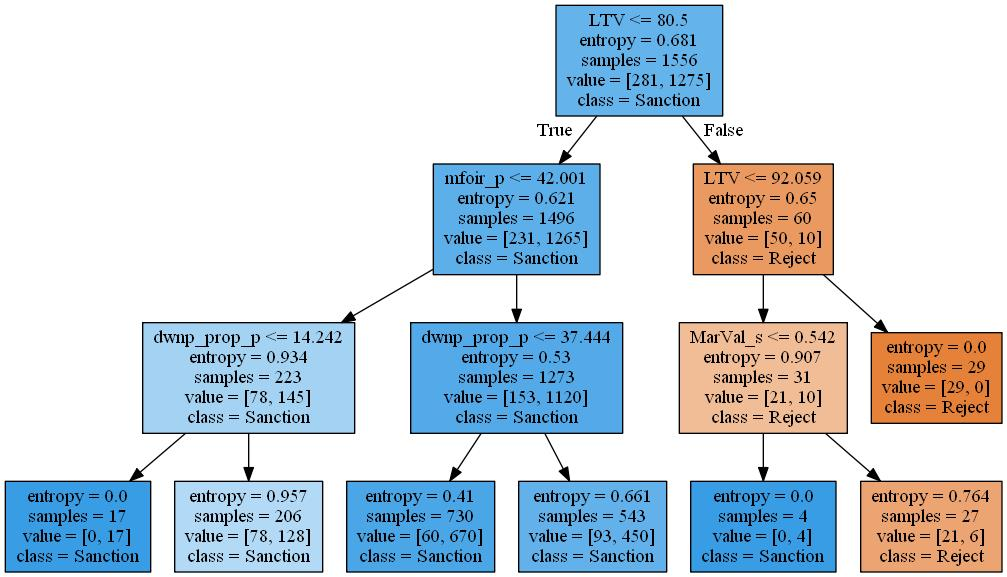

In [327]:
# Render the png file
Image(filename='chd_tree_entropy.png')

### <font color='Blue'>3.9 Calculating Entropy</font>

In [328]:
import math
entropy_node_1 = - (231/1496) * math.log2(231/1496) - (1265/1496) * math.log2(1265/1496)
print( round( entropy_node_1, 2) )

0.62


### <font color='Blue'>3.10 Extracting Probabilities</font>

In [329]:
tree_predict = clf_tree_entropy.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [330]:
# Printing on Test Data
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(667, 2)

### <font color='Blue'>3.11 Classifier Performance</font>

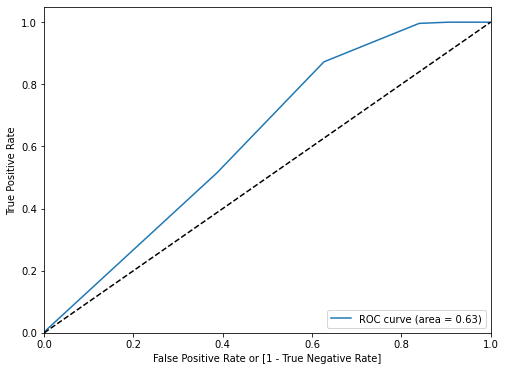

0.6255963894261767

In [331]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>3.12 Plotting Distributions and Identifying Optimal Probability</font>

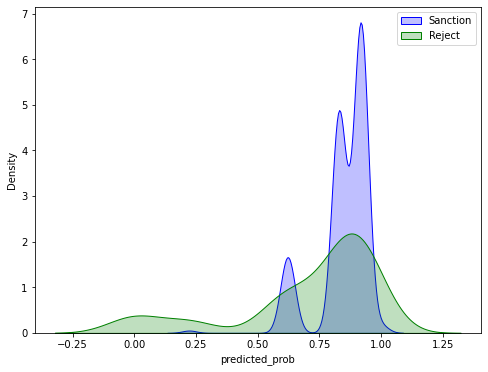

In [332]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>3.13 Confusion Matrix and Performance Measures</font>

In [333]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.625 else 0)

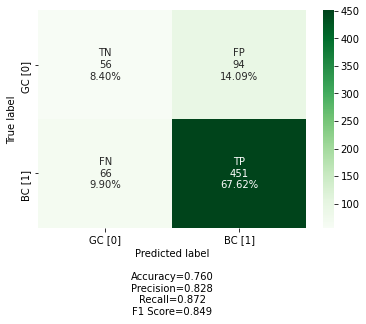

In [334]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [335]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       150
           1       0.83      0.87      0.85       517

    accuracy                           0.76       667
   macro avg       0.64      0.62      0.63       667
weighted avg       0.74      0.76      0.75       667



### <font color='Blue'>3.14 Finding optimal criteria and max_depth</font>

In [336]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [337]:
clf.best_score_

0.7137529023008709

In [338]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### <font color='Blue'>3.15 Re-Building the tree using Gini Criteria</font>

In [339]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### <font color='Blue'>3.16 Extracting Probabilities</font>

In [340]:
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [341]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(667, 2)

### <font color='Blue'>3.17 Classifier Performance</font>

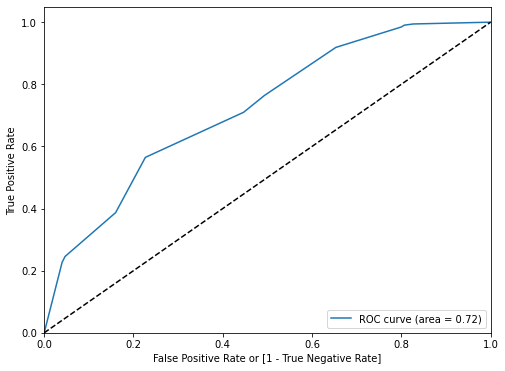

0.7217214700193424

In [342]:
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>3.18 Plotting Distributions and Identifying Optimal Probability</font>

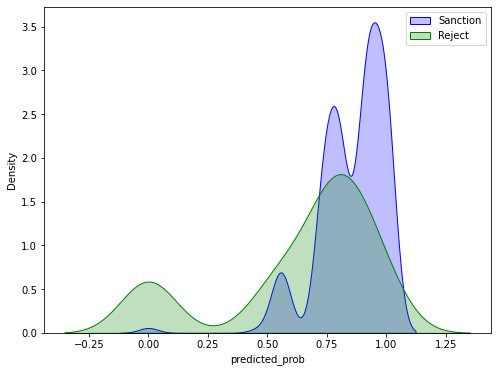

In [343]:
# Identifying the right probability
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>3.19 Confusion Matrix and Performance Measures</font>

In [344]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.6 else 0)

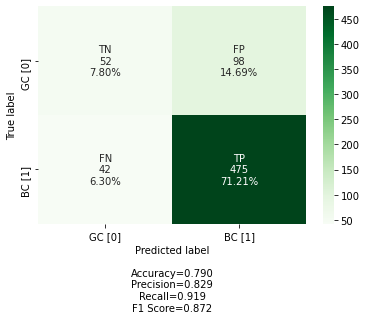

In [345]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [346]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.55      0.35      0.43       150
           1       0.83      0.92      0.87       517

    accuracy                           0.79       667
   macro avg       0.69      0.63      0.65       667
weighted avg       0.77      0.79      0.77       667



### <font color='Blue'>3.20 Displaying the Decision Tree</font>

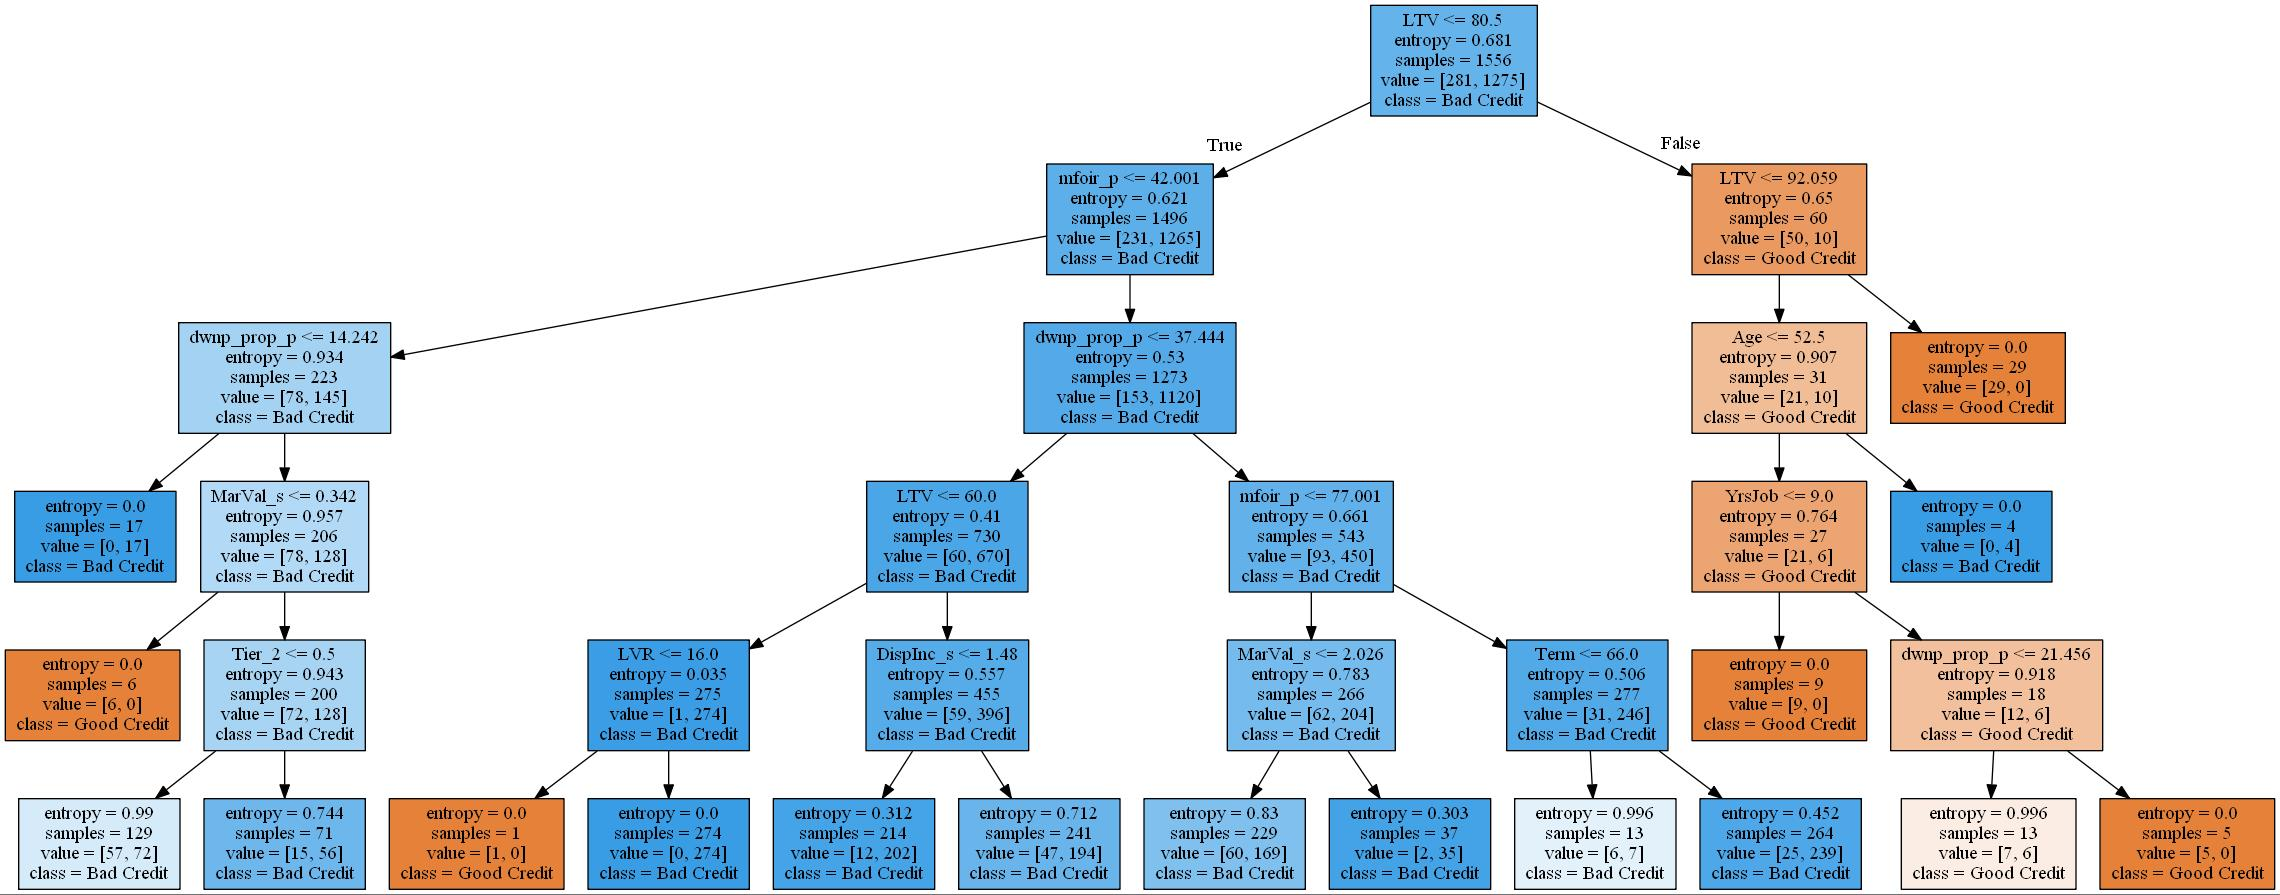

In [347]:
# Displaying the tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Good Credit', 'Bad Credit'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

# Render the png file
Image(filename='chd_tree.png')

### <font color='Blue'>4.0 Naive-Bayes Classifier</font>

### <font color='Blue'>4.1 Building Naive-Bayes Model</font>

In [348]:
from sklearn.naive_bayes import GaussianNB

In [349]:
gnb = GaussianNB().fit(X_train, y_train)

### <font color='Blue'>4.2 Extracting Probabilities</font>

In [350]:
gnb_predict = gnb.predict_proba( X_test )
gnb_predict = pd.DataFrame(gnb_predict)[1]
gnb_predict = gnb_predict.to_numpy()

In [351]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gnb_predict 
                          } )
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
1873,1,0.659141
634,1,0.501475
767,0,0.861513
585,1,0.596560
976,1,0.300278
555,1,0.901446
2072,0,0.420977
1903,0,0.025203
447,1,0.002403
69,1,0.001070


### <font color='Blue'>4.3 Classifier Performance</font>

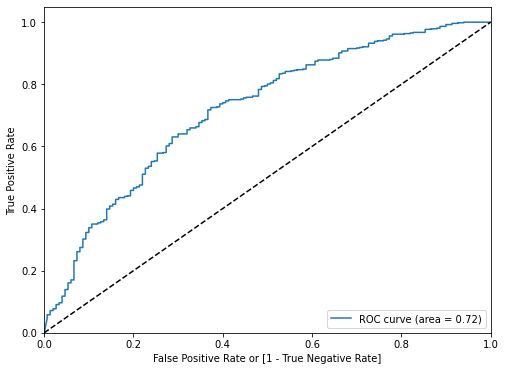

0.7191231463571889

In [352]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>4.4 Plotting Distributions and Identifying Optimal Probability</font>

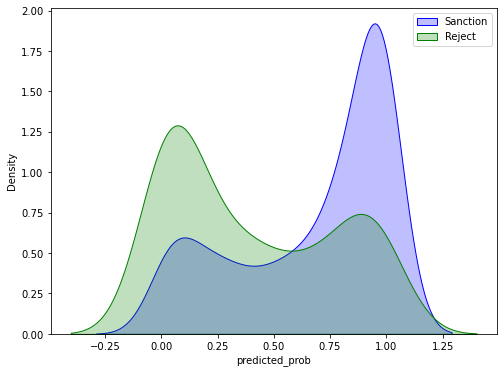

In [353]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>4.5 Confusion Matrix and Performance Measures</font>

Y Predicted
1    413
0    254
Name: gnb_predict, dtype: int64

Y Actual
1    517
0    150
Name: actual, dtype: int64

confusion matrix
[[ 95  55]
 [159 358]]


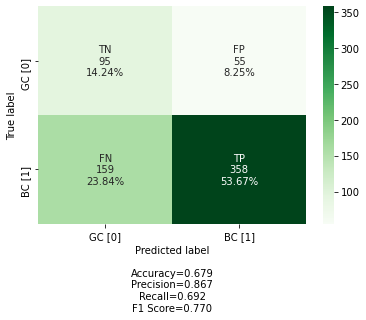

In [354]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.55 else 0)

print("Y Predicted")
print(y_pred_df.gnb_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.gnb_predict, [0,1] )
print(cm)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [355]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['gnb_predict'] ) )

              precision    recall  f1-score   support

           0       0.37      0.63      0.47       150
           1       0.87      0.69      0.77       517

    accuracy                           0.68       667
   macro avg       0.62      0.66      0.62       667
weighted avg       0.76      0.68      0.70       667



### <font color='Blue'>5.0 K-nearest Neighbours</font>

In k-NN Classification, an object is assigned to the class most common among its k nearest neighbors. 

<img src="KNN_14.jpg" width="400" height="500" >

The test sample (green dot) should be classified either to blue squares or to red triangles. 

If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. 

If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).


In k-NN Classification, an object is assigned to the class most common among its k nearest neighbors. 
The algorithm only stores the training examples during the learning phase
The algorithm is executed during the classification phase. The unlabeled observation is assigned the label which is the most frequent among its k-nearest neighbours.


In [356]:
from sklearn.neighbors import KNeighborsClassifier

### <font color='Blue'>5.1 Training KNN</font>

In [357]:
knnmodel = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

### <font color='Blue'>5.2 Applying KNN</font>

In [358]:
knn_predict= knnmodel.predict( X_test )

### <font color='Blue'>5.3 Confusion Matrix</font>

Y Predicted
1    608
0     59
Name: knn_predict, dtype: int64

Y Actual
1    517
0    150
Name: actual, dtype: int64

confusion matrix
[[ 32 118]
 [ 27 490]]


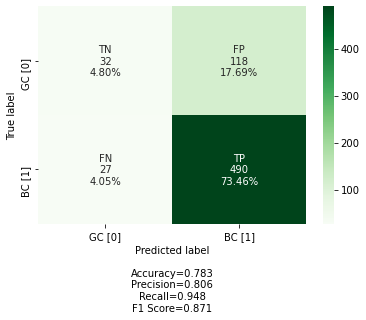

In [359]:
y_pred_df['knn_predict'] = knn_predict

print("Y Predicted")
print(y_pred_df.knn_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.knn_predict, [0,1] )
print(cm)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.knn_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [360]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['knn_predict'] ) )

              precision    recall  f1-score   support

           0       0.54      0.21      0.31       150
           1       0.81      0.95      0.87       517

    accuracy                           0.78       667
   macro avg       0.67      0.58      0.59       667
weighted avg       0.75      0.78      0.74       667



### <font color='Blue'>6.0 Summary of Results</font>

Results
    
    Logistic Regression: AUC -    0.77  ; Accuracy 0.72 ; Sensitivity 0.74 ; Specificity  0.67 ;Precision 0.88
    CART               : AUC -    0.717 ; Accuracy 0.79 ; Sensitivity 0.92 ; Specificity  0.34 ;Precision 0.83
    N-Bayes            : AUC -    0.719 ; Accuracy 0.68 ; Sensitivity 0.69 ; Specificity  0.63 ;Precision 0.87
    KNN                : AUC -    NA    ; Accuracy 0.77 ; Sensitivity 0.91 ; Specificity  0.28 ;Precision 0.81

Based on AUC Score Logistic Regression is the best

### <font color='Blue'>7.0 Summary of Results</font>

<img src="SUM_15.jpg" width="600" height="800" >